In [ ]:
!pip install scikit-survival

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import scikit-survival
import sksurv

In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#Import dataset

scooter_data = pd.read_csv(
    'cleaned_better_scooter.csv')
scooter_data.head()

,id,tte,need_repair,usage_length_days,manufactor,avg_complains,ride_miles
0,1,57.0,True,58.766838,C,21.3,6.2
1,2,736.0,False,56.447815,C,4.6,88.0
2,3,145.0,True,70.074472,B,1.8,88.4
3,4,275.0,True,54.742087,C,5.3,131.8
4,6,357.0,True,66.260541,A,0.7,60.0


In [ ]:
scooter_data.shape

(283, 7)

In [ ]:
scooter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 283 non-null    int64  
 1   tte                283 non-null    float64
 2   need_repair        283 non-null    bool   
 3   usage_length_days  283 non-null    float64
 4   manufactor         283 non-null    object 
 5   avg_complains      283 non-null    float64
 6   ride_miles         283 non-null    float64
dtypes: bool(1), float64(4), int64(1), object(1)
memory usage: 13.7+ KB


In [ ]:
scooter_data.describe().round()

,id,tte,usage_length_days,avg_complains,ride_miles
count,283.0,283.0,283.0,283.0,283.0
mean,150.0,343.0,51.0,7.0,127.0
std,89.0,190.0,10.0,8.0,93.0
min,1.0,6.0,29.0,0.0,6.0
25%,72.0,198.0,44.0,1.0,71.0
50%,148.0,342.0,51.0,2.0,113.0
75%,222.0,473.0,58.0,11.0,160.0
max,312.0,744.0,78.0,41.0,1205.0


In [ ]:
scooter_data.corr().style

,id,tte,need_repair,usage_length_days,avg_complains,ride_miles
id,1.000000,-0.224873,-0.370867,-0.022566,-0.233024,-0.131589
tte,-0.224873,1.000000,-0.584574,-0.215777,-0.389063,-0.213347
need_repair,-0.370867,-0.584574,1.000000,0.253700,0.577017,0.342298
usage_length_days,-0.022566,-0.215777,0.253700,1.000000,-0.033051,-0.117033
avg_complains,-0.233024,-0.389063,0.577017,-0.033051,1.000000,0.448281
ride_miles,-0.131589,-0.213347,0.342298,-0.117033,0.448281,1.000000


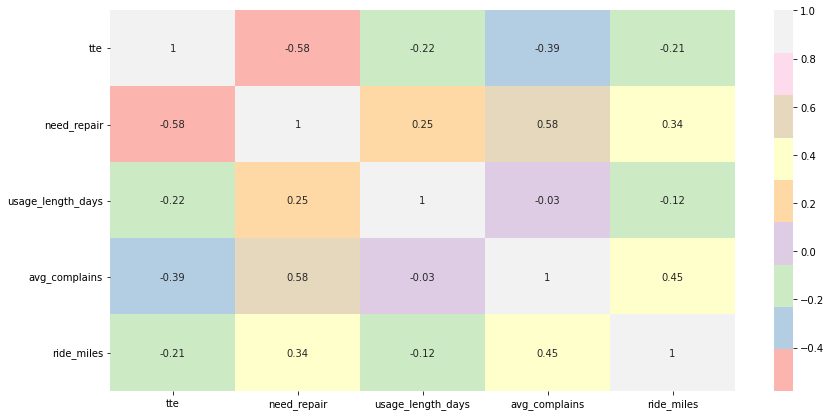

In [ ]:
#DESCRIPTIVE ANALYTICS

#First we draw a correlation heatmap of all variables

import seaborn as sns

scooter_data.drop('id', axis = 1, inplace = True)
correlation = scooter_data.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'Pastel1')

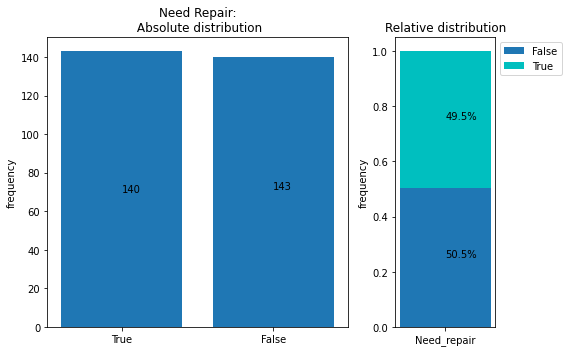

In [ ]:
#Exploratory Data Analytics and Visualizations

from matplotlib import gridspec
import matplotlib.ticker as mtick

# plot need_repair True and False
keys, counts = np.unique(scooter_data.need_repair, return_counts=True)
counts_norm = counts/counts.sum()

fig = plt.figure(figsize=(8, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[3,1])

#Absolute values
ax0 = plt.subplot(gs[0])
ax0 = plt.bar(['True', 'False'], counts)
ax0 = plt.title('Need Repair:\n Absolute distribution')
ax0 = plt.ylabel('frequency')
ax0 = plt.text(['False'], counts[0]/2, counts[0])
ax0 = plt.text(['True'], counts[1]/2, counts[1])

#Normalized values
ax1 = plt.subplot(gs[1])
ax1 = plt.bar(['Need_repair'], [counts_norm[0]], label='False')
ax1 = plt.bar(['Need_repair'], [counts_norm[1]], bottom=counts_norm[0], label='True',color=['c','m'])
ax1 = plt.legend(bbox_to_anchor=(1, 1))
ax1 = plt.title('Relative distribution')
ax1 = plt.ylabel('frequency')
ax1 = plt.text(['Need_repair'],counts_norm[0]/2, '{}%'.format((counts_norm[0]*100).round(1)))
ax1 = plt.text(['Need_repair'],(counts_norm[1]/2)+counts_norm[0], '{}%'.format((counts_norm[1]*100).round(1)))

plt.tight_layout()
plt.show()

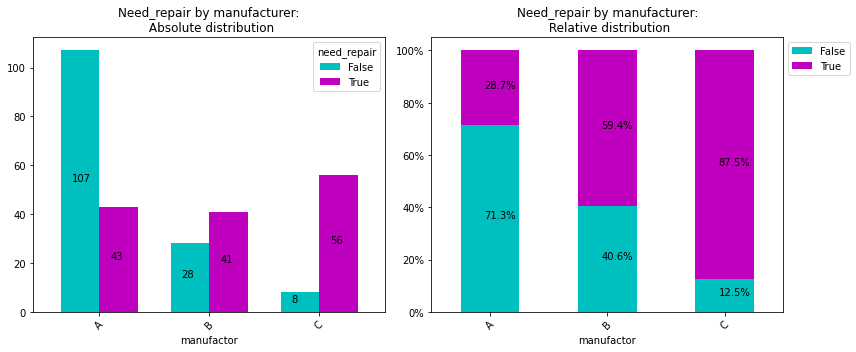

In [ ]:
#Need_repair by manufacturers
fig = plt.figure(figsize=(12, 5))

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = scooter_data.groupby(['manufactor', 'need_repair'])['need_repair'].count().unstack().plot.bar(rot=45, ax=plt.gca(), width=0.7, color=['c','m'])
plt.title('Need_repair by manufacturer:\n Absolute distribution')

#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() + 0.1, p.get_height() /2))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = scooter_data.groupby(['manufactor', 'need_repair'])['need_repair'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=45, ax=plt.gca(),color=['c','m'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Need_repair by manufacturer:\n Relative distribution')

#plot bar labels
for p, q in zip(ax2.patches[0:3], ax2.patches[3:6]):
    ax2.annotate(str(round(p.get_height(),1))+'%', (p.get_x()+0.2, p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1))+'%', (q.get_x()+0.2, q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

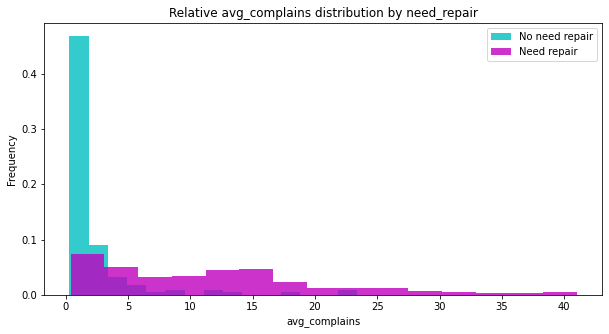

In [ ]:
#Need_repair by avg_complains
ax = scooter_data['avg_complains'].loc[scooter_data['need_repair'] == False].plot.hist(bins=15, density = True, alpha=0.8, label='No need repair', figsize = (10,5),color='c' )
ax = scooter_data['avg_complains'].loc[scooter_data['need_repair'] == True].plot.hist(bins=15, density = True, alpha=0.8, label='Need repair', figsize = (10,5),color='m')
ax.set_xlabel('avg_complains')
ax.set_title('Relative avg_complains distribution by need_repair')
ax.legend();

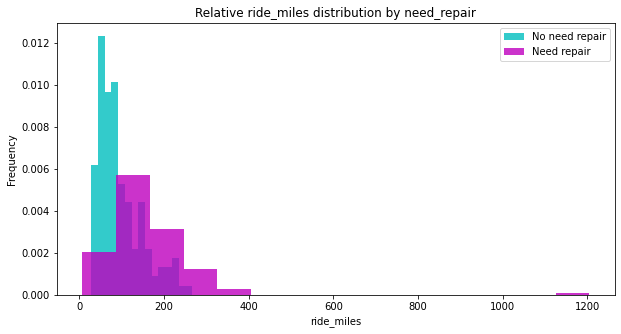

In [ ]:
#Need_repair by ride_miles
ax = scooter_data['ride_miles'].loc[scooter_data['need_repair'] == False].plot.hist(bins=15, density = True, alpha=0.8, label='No need repair', figsize = (10,5),color='c' )
ax = scooter_data['ride_miles'].loc[scooter_data['need_repair'] == True].plot.hist(bins=15, density = True, alpha=0.8, label='Need repair', figsize = (10,5),color='m')
ax.set_xlabel('ride_miles')
ax.set_title('Relative ride_miles distribution by need_repair')
ax.legend();

In [ ]:
from sksurv.datasets import get_x_y
from sksurv.util import Surv

surv_features, surv_labels_df = get_x_y(scooter_data, ['need_repair','tte'],survival = False)
surv_labels = Surv.from_dataframe('need_repair','tte',surv_labels_df)
print('\n======== features for survival analysis ========\n', surv_features[:10])
print('\n======== labels for survival analysis ========\n',surv_labels[:10])


======== features for survival analysis ========
    usage_length_days manufactor  avg_complains  ride_miles
0          58.766838          C           21.3         6.2
1          56.447815          C            4.6        88.0
2          70.074472          B            1.8        88.4
3          54.742087          C            5.3       131.8
4          66.260541          A            0.7        60.0
5          55.536086          A            1.4        54.0
6          53.058263          B            5.4       120.9
7          42.509035          C           14.8       221.7
8          70.561822          C           12.6       147.3
9          53.715365          C            9.6       121.0

======== labels for survival analysis ========
 [( True,  57.) (False, 736.) ( True, 145.) ( True, 275.) ( True, 357.)
 (False, 357.) ( True, 352.) ( True, 342.) ( True,   8.) ( True, 536.)]


Text(0.5, 0, 'Scooter Duration Time')

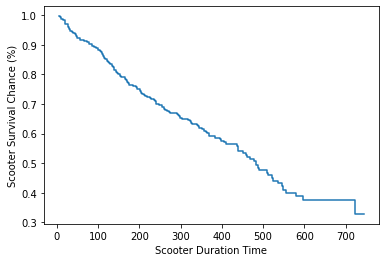

In [ ]:
#Import Kaplan_Meier_Estimator

from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(surv_labels["need_repair"], surv_labels["tte"])
plt.step(time, survival_prob, where="post")
plt.ylabel("Scooter Survival Chance (%)")
plt.xlabel("Scooter Duration Time")

In [ ]:
surv_features["manufactor"].value_counts()


A    150
B     69
C     64
Name: manufactor, dtype: int64

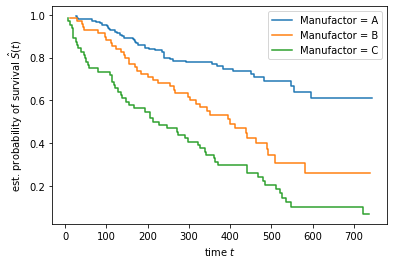

In [ ]:
for manufactor_type in ('A', 'B', 'C'):
    mask_manufactor = surv_features["manufactor"] == manufactor_type
    time_manufactor, survival_prob_manufactor = kaplan_meier_estimator(
        surv_labels["need_repair"][mask_manufactor],
        surv_labels["tte"][mask_manufactor])

    plt.step(time_manufactor, survival_prob_manufactor, where="post",
             label="Manufactor = %s" % manufactor_type)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

In [ ]:
from sksurv.compare import compare_survival

compare_survival(surv_labels,surv_features.manufactor.values,return_stats=True)

(61.06160595176763,
 5.503522413332893e-14,
        counts  observed   expected  statistic
 group                                        
 A         150        43  82.781297 -39.781297
 B          69        41  32.419593   8.580407
 C          64        56  24.799110  31.200890,
 array([[ 33.61122521, -19.07233748, -14.53888773],
        [-19.07233748,  24.83097546,  -5.75863798],
        [-14.53888773,  -5.75863798,  20.29752571]]))

The null hypothesis is: "There is no difference between group A, B, and C in terms of distribution of time until the event occurs."
</br>
</br>
Since the p-value = 5.503522413332893e-14 < 0.001, the null hypothesis is rejected. This means the test stated that there are differences between group A, B and C in terms of distribution of time until event.



Conduct CoxPHSurvivalAnalysis and random survival forests analysis. Compare the c-index from these two models and report feature importance with one of the models. Interpret your result

In [ ]:
#Since we alreadry dropped column id in the previous steps, we don't need to do that again.

# one hot encode the categorical features
cat_features = ['manufactor']
surv_features_2 = pd.get_dummies(surv_features,
                              drop_first=True,
                              columns=cat_features)

surv_features_2.head()

,usage_length_days,avg_complains,ride_miles,manufactor_B,manufactor_C
0,58.766838,21.3,6.2,0,1
1,56.447815,4.6,88.0,0,1
2,70.074472,1.8,88.4,1,0
3,54.742087,5.3,131.8,0,1
4,66.260541,0.7,60.0,0,0


In [ ]:
#Split data into testing and training

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

from sksurv.datasets import load_gbsg2
from sksurv.ensemble import RandomSurvivalForest


X_train, X_test, y_train, y_test = train_test_split(surv_features_2, surv_labels, test_size=0.25, random_state=2022)

In [ ]:
#Conduct Cox Regression

from sklearn import set_config
from sksurv.linear_model import CoxPHSurvivalAnalysis

set_config(display="text")  # displays text representation of estimators

estimator = CoxPHSurvivalAnalysis()
estimator.fit(X_train, y_train)

CoxPHSurvivalAnalysis()

In [ ]:
pd.Series(estimator.coef_, index=X_train.columns)

usage_length_days    0.046168
avg_complains        0.072703
ride_miles           0.000505
manufactor_B         0.463628
manufactor_C         0.665193
dtype: float64

In [ ]:
#Measuring the Performance of Cox Regression Survival Model
estimator.score(X_test, y_test)

0.7706359945872802

In [ ]:
#Build and fit the RandomSurvivalForest model
rsf = RandomSurvivalForest(n_estimators=1000,
                           min_samples_split=6,
                           min_samples_leaf=3,
                           n_jobs=-1,
                           random_state=2022)
rsf.fit(X_train, y_train)


RandomSurvivalForest(n_estimators=1000, n_jobs=-1, random_state=2022)

In [ ]:
#C-index
rsf.score(X_test, y_test)

0.7631935047361299

**Compare c-index score between 2 models**
</br>- C-index score for Random Survival Forest is 0.763 > 0.7, which means the model is good.
</br>- C-index score for Cox Regression is 0.771 > 0.7, which means the model is good.
</br>- This also means the Cox Regression is *slightly* better than Random Survival Forest.



In [ ]:
##Feature Importance of Random Survival Forest

from sklearn.inspection import permutation_importance

result = permutation_importance(
    rsf, X_test, y_test, n_repeats=15, random_state=2022
)

pd.DataFrame(
    {k: result[k] for k in ("importances_mean", "importances_std",)},
    index=X_test.columns
).sort_values(by="importances_mean", ascending=False)

,importances_mean,importances_std
avg_complains,0.177853,0.045096
usage_length_days,0.027560,0.015665
ride_miles,0.017005,0.012313
manufactor_C,0.006180,0.007181
manufactor_B,-0.002300,0.005169


The result shows that relatively speaking, the number of average complaints is the feature with more importance than others when it comes to predicting survival rates (highest importances_mean and rather low standard deviation). On the otherhand, other features (with low importances_mean and high standard deviation) have low effect on the survival rates.



Predict and plot the survival rate with one of the models (random forest or Cox PH regression) for the ten scooters with the trained model from task

In [ ]:
#Import dataset ten_scooter

ten_scooter_data = pd.read_csv(
    'ten_scooters.csv')
ten_scooter_data.head()

,id,usage_length_days,avg_complains,ride_miles,manufactor_A,manufactor_B,manufactor_C
0,1,56.447815,4.6,88.0,0,0,1
1,2,55.536086,1.4,54.0,1,0,0
2,3,53.058263,5.4,120.9,0,1,0
3,4,45.690505,1.2,72.0,1,0,0
4,5,64.647903,11.4,114.0,0,0,1


In [ ]:
#Remove 'id' column
ten_scooter_data.drop(['id','manufactor_A'], axis = 1, inplace = True)
ten_scooter_data.head()

,usage_length_days,avg_complains,ride_miles,manufactor_B,manufactor_C
0,56.447815,4.6,88.0,0,1
1,55.536086,1.4,54.0,0,0
2,53.058263,5.4,120.9,1,0
3,45.690505,1.2,72.0,0,0
4,64.647903,11.4,114.0,0,1


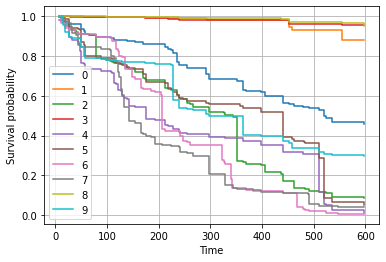

In [ ]:
#Predict the survival rate of ten_scooters using Random Survival Forest

surv = rsf.predict_survival_function(ten_scooter_data, return_array=True)

for i, s in enumerate(surv):
    plt.step(rsf.event_times_, s, where="post", label=str(i))
plt.ylabel("Survival probability")
plt.xlabel("Time")
plt.legend()
plt.grid(True)